# Learning Cross Tabulation

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from ipywidgets import interact 

data = pd.read_csv('employee.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
data[['Attrition', 'Department']].tail()

,Attrition,Department
1465,No,Research & Development
1466,No,Research & Development
1467,No,Research & Development
1468,No,Sales
1469,No,Research & Development


In [3]:
pd.crosstab(data.Attrition, data.Department)

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


## Visualizing Cross Tabulation

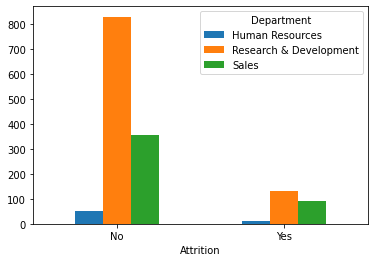

In [4]:
pd.crosstab(data.Attrition, data.Department).plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

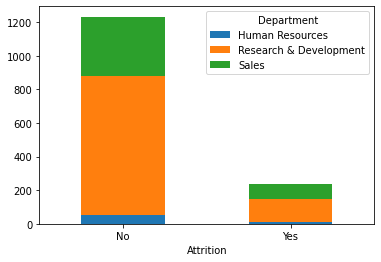

In [5]:
pd.crosstab(data.Attrition, data.Department).plot(kind = 'bar', stacked = True)
plt.xticks(rotation = 0)
plt.show()

## Interacting groupby operations

**Interact** allows us to explore code and data interactively

In [14]:
data[['Age', 'Department']].groupby('Department').agg('mean').sort_values('Age')

,Age
Department,
Sales,36.542601
Research & Development,37.042664
Human Resources,37.809524


In [7]:
@interact(column = 'EducationField') 
def groupby(column = list(data.select_dtypes('object').columns)):
    return data[['Age', column]].groupby([data[column]]).agg('mean').style.background_gradient('PuBuGn', subset = ['Age'])

interactive(children=(Text(value='EducationField', description='column'), Output()), _dom_classes=('widget-int…

In [9]:
@interact(column = 'EducationField', index = 'PerformanceRating') 
def groupby(column = list(data.select_dtypes('object').columns), index = list(data.select_dtypes('number').columns)):
    return data[[index, column]].groupby([data[column]]).agg('mean').style.background_gradient('PuBu')

interactive(children=(Text(value='EducationField', description='column'), Text(value='PerformanceRating', desc…